# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

In [2]:
# Show your work; leave your answer in a comment.



In [3]:
### summing up all of the pmfs from 21 to 100

sum([stats.binom(n=100, p=.15).pmf(i) for i in range(21,101)])

0.06631976581888226

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [4]:
# Show your work; leave your answer in a comment.

1 - stats.binom(n=100, p=.15).cdf(20)

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [5]:
# Show your work; leave your answer in a comment.

In [6]:
p_dist = stats.poisson(2.7)

In [7]:
revenue = 500_000

users = round(revenue / 2.7, -3) + 1000

In [8]:
users

186000.0

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [9]:
# Show your work; leave your answer in a comment.
total_low = 0 
for n_boxes in range(5):
    pct = p_dist.pmf(n_boxes)
    
    n_users = pct * users
    
    rev = n_users * n_boxes
    total_low = total_low + rev
    
    print(f"{rev} in revenue from the {n_users} users who purchase {n_boxes} boxes")
    
total_low

0.0 in revenue from the 12500.225369593454 users who purchase 0 boxes
33750.60849790233 in revenue from the 33750.60849790233 users who purchase 1 boxes
91126.64294433629 in revenue from the 45563.32147216814 users who purchase 2 boxes
123020.96797485402 in revenue from the 41006.98932495134 users who purchase 3 boxes
110718.8711773686 in revenue from the 27679.71779434215 users who purchase 4 boxes


358617.0905944612

In [10]:
high_rev = 500_000 - total_low

In [11]:
high_rev

141382.9094055388

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [12]:
attempts_until_elixir = []
for _ in range(100_000):

    no_elixir_yet = True

    counter = 0
    while no_elixir_yet:
        counter += 1
        draw = np.random.choice(['No Elixir', 'Elixir'], p=[.85, .15])
        no_elixir_yet = draw != 'Elixir'
        
    attempts_until_elixir.append(counter)

In [15]:
np.mean(attempts_until_elixir)

6.65127

In [13]:
for i in [5,25,50,95]:
    print(f'{i}th percentile: {np.percentile(attempts_until_elixir, i)} box for elixir')



5th percentile: 1.0 box for elixir
25th percentile: 2.0 box for elixir
50th percentile: 5.0 box for elixir
95th percentile: 19.0 box for elixir


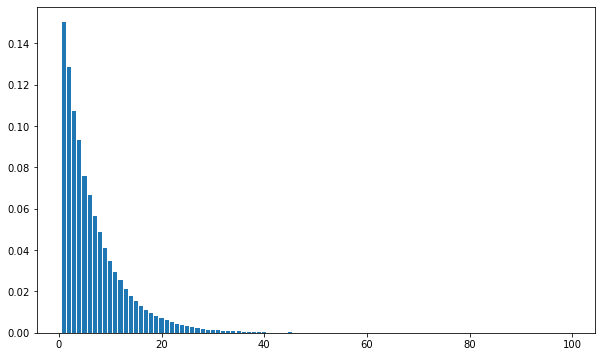

In [14]:
### visualizing the result 

fig , ax = plt.subplots(figsize=(10,6))

ax.bar([i for i in range(1,100)] ,[attempts_until_elixir.count(i) / 100_000 for i in range(1,100)]);

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

In [15]:
## simulating this for version two dictionary is the best data structure 

attempts_until_all = []

c = 0 
for _ in range(100_000):
    c+= 1
    ## this takes a while to run so I want an update at every 10,000 iterations 
    if c % 10_000 == 0:  
        print(f"At iteration {c}")

    dct = {'ME':0, 'GP':0, 'SA':0, 'BC':0}
    withstanding = ['ME', 'GP', 'SA', 'BC']
    while len(withstanding) >= 1:
        for item in withstanding:
            dct[item] += 1
        draw = np.random.choice(['ME', 'GP', 'SA', 'BC'], p=[.01, .09, .3,.6])
        try:
            withstanding.remove(draw)
        except:
            continue
        
    attempts_until_all.append(dct)

At iteration 10000
At iteration 20000
At iteration 30000
At iteration 40000
At iteration 50000
At iteration 60000
At iteration 70000
At iteration 80000
At iteration 90000
At iteration 100000


In [16]:
import seaborn as sns
import pandas as pd

In [17]:
df = pd.DataFrame.from_dict(attempts_until_all)

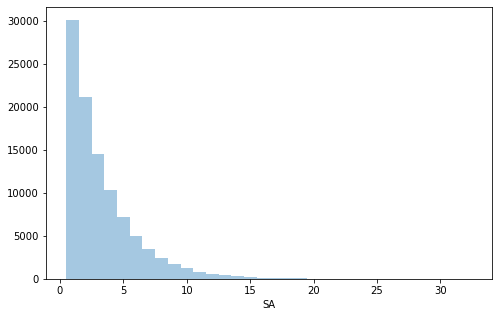

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

sns.distplot(df['SA'], ax=ax, bins=np.arange(.5, df['SA'].max() + .5, 1), kde=False);

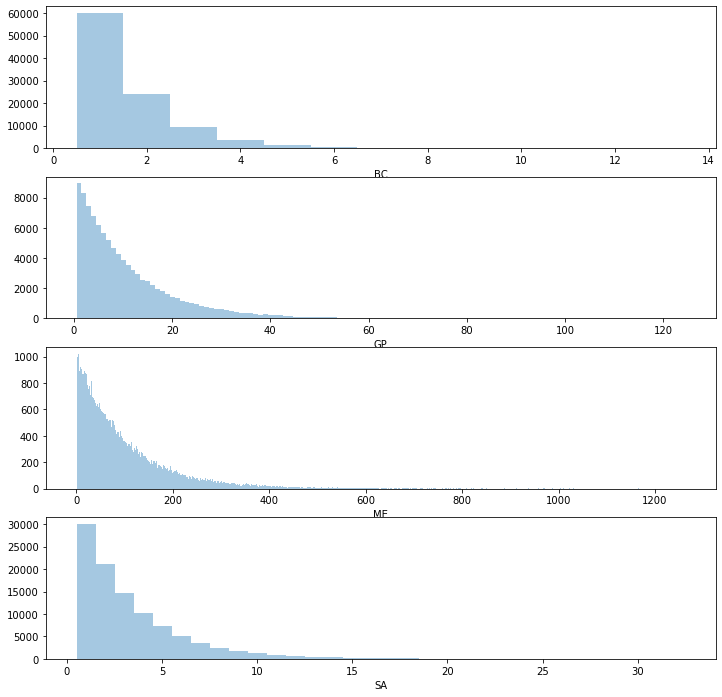

In [19]:
fig , axs = plt.subplots(figsize=(12,12), nrows=4)

for ax, col in zip(axs, df.columns): 
    sns.distplot(df[col],bins=np.arange(.5, df[col].max()+.5, 1) , ax=ax, kde=False);

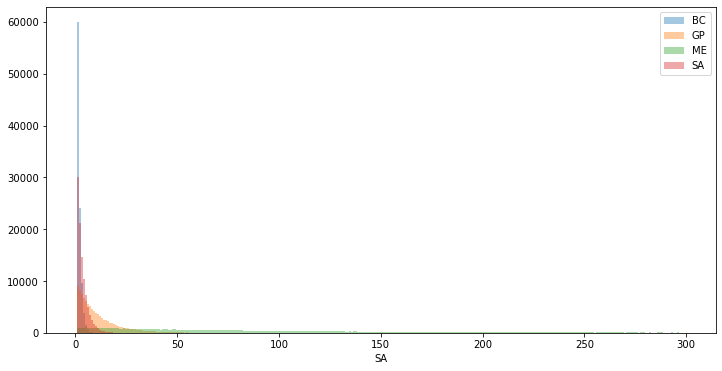

In [20]:
## hard to see when the magic elixir is so infrequent 

fig , ax = plt.subplots(figsize=(12,6))

for col in df.columns: 
    sns.distplot(df[col],bins=np.arange(.5, 300.5, 1) , ax=ax, kde=False, label=col)
    
ax.legend();

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.